# Libraries

In [4]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import scipy
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from IPython.core.display import Image, display
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from plot_sklearn_dendrogram import plot_sklearn_dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import parallel_coordinates
import graphviz 
from sklearn import tree
%matplotlib inline
np.random.seed(10)
random.seed(10)
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing # to scale data
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates

# Définition des fonctions

In [5]:
def compute_stability(k,df,iterations=100):
    silhouette_coef = []
    for i in range(iterations):
        km = KMeans(n_clusters=k, n_init=1, random_state=i) # create a KMeans object
        km.fit(DF_kmeans1)
        labels = km.predict(DF_kmeans1)
        silhouette_coef.append(silhouette_score(DF_kmeans1, labels, metric='euclidean', sample_size=None))
    silhouette_coef = np.asarray(silhouette_coef)
    return(silhouette_coef.std())

In [6]:
def fancy_dendrogram(*args, **kwargs):
    '''This function allows to draw a dendrogram, with distances annoted inside the dendogram
      Function of Jörn's Blog :
      (https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)  '''
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [7]:
def kmeans_SSE(df,ax):
    """Plots SSE evolution for different clusters numbers (from 1 to 15) for a dataframe df."""
    sse = []
    Ks = range(1, 15)
    for k in Ks:
        km = KMeans(n_clusters=k, n_init=20, random_state=k) # create a KMeans object
        km.fit(df)
        #distance.append(np.sqrt(km.inertia_))
        sse.append(km.inertia_)
    ax.plot(Ks,sse)
    ax.set_xlabel("$k$",fontsize=20)
    ax.set_ylabel("SSE",fontsize=14)
    return sse

In [8]:
def kmeans_1D(attribute,n):
    """Prend en entrée un nparray et n clusters"""
    km1 = KMeans(n_clusters=n) # create a KMeans object
    km1.fit(attribute.reshape(-1,1))
    return km1

In [9]:
def plot_dendro_km(df,km):
    """Plots the dendrogram for a specified clustering km and a table df.
    Returns the Agglomerative clustering object."""
    DF_Dendro1 = df.copy(deep=True)
    agc = AgglomerativeClustering(n_clusters=len(km.cluster_centers_), affinity="euclidean", linkage="complete")
    agc.fit(DF_Dendro1)
    plt.title('Hierarchical Clustering Dendrogram')
    plot_sklearn_dendrogram(agc, labels=agc.labels_)
    plt.show()
    return agc

In [10]:
def plot_kmeans1D(attr,labels):
    """Entree : liste ou nparray"""
   # at  = sorted(attr )
    at = attr
    x_ind = range(0, len(at))
    plt.hist(at);

    plt.show()

In [11]:
# 3D plot using pyplot
def plot_km3d(km,df):
    """km est un objet de Kmeans. df est le dataframe correspondant sur lequel on a fait l'analyse."""
    fig = plt.figure() #opens a figure environment
    ax = Axes3D(fig) #to perform a 3D plot
    x=df.loc[:,'CO2']
    y=df.loc[:,'Population']
    z=df.loc[:,'Life_expectancy']
    ax.scatter(x, y, z,c=km.labels_.astype(np.float)) #plot definition and options 
    ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c='r',s=100)
    # We set the colors to be in function of the labels of each cluster, ie each category
    # Cluster centers are in red
    ax.set_xlabel('CO2')
    ax.set_ylabel('Population')
    ax.set_zlabel('Life_expectancy')

In [12]:
def plot_pred_nbclusters(attr):
    """Entree : liste ou nparray"""
   # at  = sorted(attr )
    at =attr
    x_ind = range(0, len(at))
    plt.hist(at )
    plt.show()

In [13]:
def silhouette_kmeans(df,ax):
    """Plots Silhouette coefficient evolution for different values of k (clusters number)."""
    silhouette_coef = []
    Ks = range(2, 30)
    for k in Ks:
        km = KMeans(n_clusters=k, n_init=20, random_state=k) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    ax.plot(Ks,silhouette_coef)
    ax.set_xlabel("$k$",fontsize=20)
    ax.set_ylabel("Silhouette Coef.",fontsize=14)

In [41]:
def silhouette_dbscan(df,minpts,min_knee):
    """Plots Silhouette coefficient evolution for different values of eps with a specified minpts parameter.
    Min_knee is the above limit value for eps.
    If one cluster (or only one cluster + noise points), silhouette arbitrary set to 0."""
    silhouette_coef = []
    Eps = np.arange(0.01,min_knee,0.01)
    for e in Eps:
        db = DBSCAN(min_samples=minpts,eps=e)
        db.fit(df)
        labels = db.labels_
        if len(set(labels))>2: 
            silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
        else:
            silhouette_coef.append(0)
    plt.plot(Eps,silhouette_coef)
    plt.xlabel("$eps$",fontsize=20)
    plt.ylabel("Silhouette Coef.",fontsize=14)



In [15]:
def stability_kmeans(df,ki):
    silhouette_coef = []
    sse = []
    k = ki
    n_init=1
    for i in range(100):
        km = KMeans(n_clusters=k, n_init=n_init, random_state=i) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        sse.append(km.inertia_)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    ax1=plt.subplot(2, 2, 1)
    ax1.hist(sse)
    ax1.set_xlabel("SSE")
    ax2=plt.subplot(2, 2, 2)
    ax2.hist(silhouette_coef)
    ax2.set_xlabel("Silhouette")
    plt.show()

In [16]:
def plot_stability(df):
    stability = []
    Ks = range(2,30)
    for k in Ks:
        stability.append(compute_stability(k,df))
    plt.plot(Ks,stability,"o-")
    plt.xlabel("$k$",fontsize=20)
    plt.ylabel("Instability: std(Silhouette Coef. 100 iterations)")
    plt.show()
    

In [17]:
def compute_stability(k,df,iterations=100):
    silhouette_coef = []
    for i in range(iterations):
        km = KMeans(n_clusters=k, n_init=1, random_state=i) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    silhouette_coef = np.asarray(silhouette_coef)
    return(silhouette_coef.std())

# Introduction 

Ce second Notebook est dans la continuité du premier. Dans le premier, Projet_IA_Clustering_simple, nous avions mis en place une stratégie pour l'analyse du clustering ( recherche des outliers, choix du nombre de clusters, évaluation de la qualité du clustering...). Dans seconde partie, nous allons reprendre cette stratégie sur des données en plus grande dimension.

# Importation des données

## Définition des variables 

In [18]:
df_global = pds.read_csv('./Data2/Data2.txt', sep="\t") # load a pandas dataframe from csv
df_global.head()

,Time,Time Code,Country Name,Country Code,Children out of school,CO2 emissions (kt),Non-renewable lectricity production (% of total),Renewable electricity production excluding hydroelectric (% of total),Life expectancy (years),Population,Rural population,Urban population,Surface area (sq. km)
0,2013,YR2013,Afghanistan,AFG,NaN,10014.577,NaN,NaN,62.494,31731688.0,23997724.0,7733964.0,652860.0
1,2013,YR2013,Albania,ALB,10957.0,5064.127,0.00000,0.0,77.702,2895092.0,1291587.0,1603505.0,28750.0
2,2013,YR2013,Algeria,DZA,NaN,134465.223,99.44899,0.0,75.418,38338562.0,11664124.0,26674438.0,2381740.0
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,55307.0,6997.0,48310.0,200.0
4,2013,YR2013,Andorra,AND,NaN,476.710,NaN,NaN,NaN,80788.0,9261.0,71527.0,470.0


In [19]:
df_GDP = pds.read_csv('./Data_GDP/Data_GDP.txt', sep="\t")
df_GDP =df_GDP.convert_objects(convert_numeric=True)

/Users/lisa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


On choisit de construire les attributs dérivés suivants : 
* CO2/habitant
* PIB/habitant
* population unbaine/population totale 

En effet, on veut vérifier le lien entre les variables à ressources égales (en considérant que les ressources correspondent au nombre  d'habitants).

On a choisi ces attributs qui n'ont pas de lien direct entre eux, même si on peut s'attendre à une corrélation relative entre le taux de CO2 par habitant et la population rurale.

In [20]:
df = pds.DataFrame()
df ['Life_expectancy'] = df_global['Life expectancy (years)']
df ['CO2_hab']  = df_global['CO2 emissions (kt)']/df_global['Population']
df ['GDP_hab'] =df_GDP['GDP (current US$)'] / df_global['Population']
df ['Prop_urb'] = df_global['Urban population']/df_global['Population']
df ['Country '] = df_global['Country Name']
df.head() 

,Life_expectancy,CO2_hab,GDP_hab,Prop_urb,Country
0,62.494,0.000316,638.612543,0.243730,Afghanistan
1,77.702,0.001749,4413.081697,0.553870,Albania
2,75.418,0.003507,5471.123389,0.695760,Algeria
3,NaN,NaN,11589.853002,0.873488,American Samoa
4,NaN,0.005901,40619.711298,0.885367,Andorra


## Nettoyage des lignes

Supression des lignes contenant des valeurs manquantes

In [21]:
filtered_df = df.dropna(subset=['Life_expectancy', 'CO2_hab','GDP_hab', 'Prop_urb'])

## Sélection des données à analyser

In [22]:
df_clustering=filtered_df[['Life_expectancy', 'CO2_hab','GDP_hab', 'Prop_urb']]

## Normalisation des données

### Centrage

On centre les données car elles sont exprimées dans des variables différentes et ont des ordres de grandeur complètement différents.

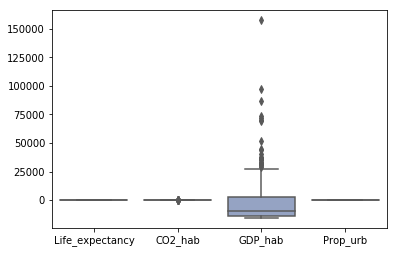

In [23]:
ax=sns.boxplot(data=(df_clustering - df_clustering.mean()), orient="v", palette="Set2")

Nous devons également réduire en raison de la variance élevée du PIB par habitant.

### Réduction 

(-2, 2)

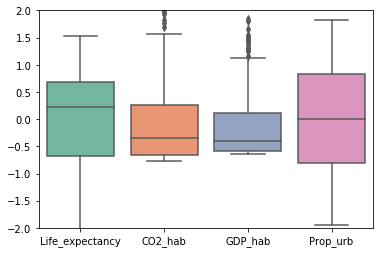

In [24]:
ax=sns.boxplot(data=(( df_clustering - df_clustering.mean() )/df_clustering.std()), orient="v", palette="Set2")
ax.set_ylim(-2,2)

Ce sont les données finales sur lesquelles on va travailler.

In [25]:
df_clustering_norm=(df_clustering - df_clustering.mean())/df_clustering.std()

# Recherche des outliers

Comme précédemment nous allons chercher les outliers grâce à DBSCAN. La première étape sera donc de paramétriser ce modèle en traçant la distance pour chaque point à son 4e voisin plus proche grâce à l'algorithme des KNN.

## Définition des paramètres de DBSCAN

In [26]:
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(df_clustering_norm)
distances, indices = nbrs.kneighbors(df_clustering_norm)
distances_to_4 = distances[:,3]
distances_to_4 = sorted(distances_to_4 , reverse = False)

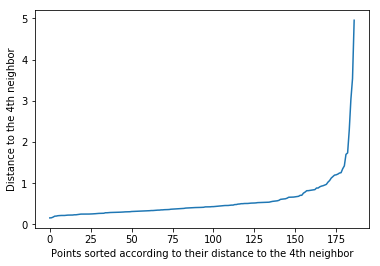

In [27]:
Index = range(0,len(distances_to_4))
plt.plot(Index , distances_to_4)
plt.xlabel('Points sorted according to their distance to the 4th neighbor')
t=plt.ylabel('Distance to the 4th neighbor')

D'après le graphique ci-dessus on observe un coude pour les pays d'indices entre 160 et 165, mais en conservant cet intervalle DBSCAN ne construit qu'un cluster. Ceci implique que les données ont une densité assez homogène. Pour repérer les pays "aberrants", il faut considérer les pays d'indices 180 à 185 (par rapport à la liste triée de la distance au quatrième voisin).

In [28]:
mean_dist_knee = sum(distances_to_4[165:175])/10
mean_dist_knee

1.0278436644746136

On considérera donc un rayon de recherche d'environs 2.034, et un nombre minimum de point égal à trois, pour considérer un cluster.

## Annalyse des résultats de DBSCAN

In [29]:
outliers_det = DBSCAN(min_samples=10,eps=mean_dist_knee).fit(df_clustering_norm)
# Number of outliers
sum(outliers_det.labels_ == -1) 

20

In [30]:
df_clustering_norm_lab= df_clustering_norm.copy(deep=True) # Copy of DF_kmeans1
df_clustering_norm_lab['Labels'] = outliers_det.labels_

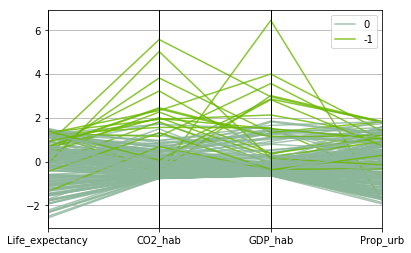

In [98]:
parallel_coordinates(df_clustering_norm_lab,'Labels', alpha=0.8)
plt.show()

In [31]:
df_clustering_countries= df_clustering_norm_lab.copy(deep=True) # Copy of DF_kmeans1
df_clustering_countries['Country'] = filtered_df.iloc[:, 4] 
print(df_clustering_countries[df_clustering_countries['Labels'] == -1])

     Life_expectancy   CO2_hab   GDP_hab  Prop_urb  Labels  \
10          1.323685  1.928295  2.130129  1.209485      -1   
14          0.639139  3.227095  0.356935  1.351241      -1   
21          1.133263  0.408998  2.858123  1.826102      -1   
28          0.680332  2.458205  1.171115  0.805227      -1   
65          1.237947  1.563794  1.540714 -0.667818      -1   
100        -0.089525  1.818253 -0.087727 -0.000782      -1   
106         0.380145  3.820241  1.327003  1.826102      -1   
114         1.337238 -0.542794  6.456734 -1.817349      -1   
116         1.281552  2.334518  4.000964  1.382670      -1   
117         1.469396 -0.432315  3.012955  1.826102      -1   
147         1.275660  1.148876  3.567808  0.987643      -1   
148         0.624160  2.004654  0.214748  0.927928      -1   
159         0.790985  5.578079  2.962941  1.774427      -1   
166         0.347287  2.262191  0.365020  1.092014      -1   
177        -1.372418  0.681874 -0.377489  0.286176      -1   
188     

In [36]:
df_without_outliers=df_clustering_norm_lab[df_clustering_norm_lab.Labels != -1]
df_without_outliers=df_without_outliers.drop('Labels',axis=1)

# Clustering

## Hiérarchique

In [150]:
acwo = AgglomerativeClustering(affinity="euclidean", linkage="complete",n_clusters=5)
acwo.fit(df_without_outliers)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func=<function mean at 0x104197b18>)

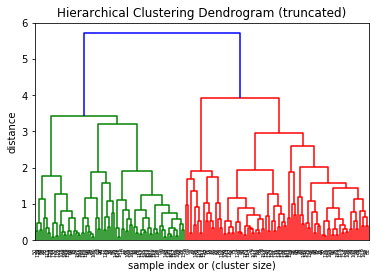

In [47]:
Z = linkage(df_without_outliers, 'complete')
# Z is a linkage matrix where distances are calculated owing complete method which is also named max
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

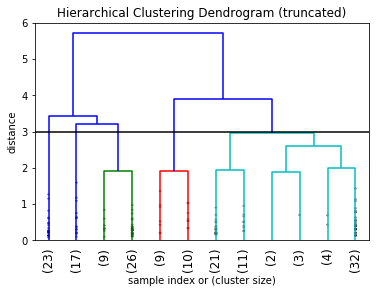

In [60]:
max_d = 3
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

Avec le clustering hiérarchique, on peut aussi initialiser les centroides de Kmeans.

In [61]:
clusters = fcluster(Z, max_d, criterion='distance')
df_without_outliers_dendro_cluster = df_without_outliers.copy()
df_without_outliers_dendro_cluster['clusters'] = clusters

In [62]:
means = df_without_outliers_dendro_cluster.groupby('clusters').mean()
Means =np.array(means)

## Kmeans

Pour définir le nombre de clusters optimal, on se base sur la SSE et le coefficient Silhouette.

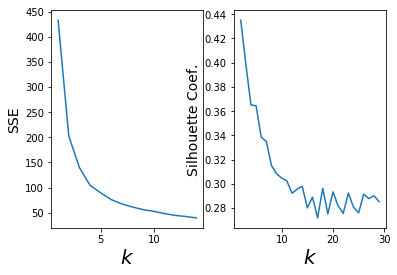

In [37]:
fig=plt.figure()
ax = fig.add_subplot(121)
sse=kmeans_SSE(df_without_outliers,ax)
ax = fig.add_subplot(122)
sil=silhouette_kmeans(df_without_outliers,ax)

La SSE suggère entre 2 et 5 clusters et le coefficient silhouette moins de 10. On choisira donc 5 clusters.

In [38]:
km=KMeans(n_clusters=5).fit(df_without_outliers)

Initialisation des centroides grâce au clustering hiérarchique avec 5 clusters : permet de ne pas répéter KMeans

In [69]:
kmdendro_max = KMeans(n_clusters=5, init = Means).fit(df_without_outliers)

In [ ]:
print(kmdendro_max.cluster_centers_)
print(km.cluster_centers_)

On retrouve bien les mêmes centroides de clusters.

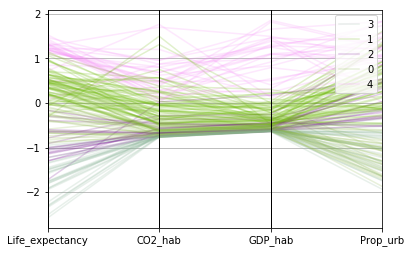

In [40]:
df_km_lab=df_without_outliers.copy()
df_km_lab['Labels']=km.labels_
parallel_coordinates(df_km_lab,'Labels', alpha=0.2)
plt.show()

### Analyse de stabilité de Kmeans

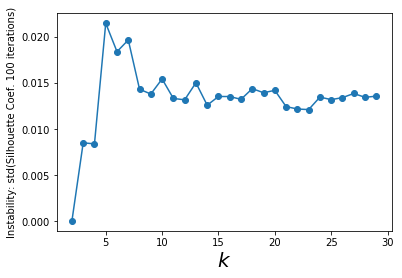

In [70]:
plot_stability(df_without_outliers)

Le coefficient Silhouette varie beaucoup autour des cinq clusters choisis : donc les clusters trouvés sont souvent différents.

## DBSCAN

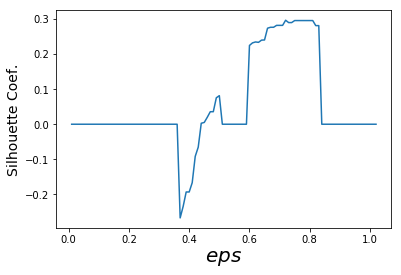

In [44]:
minpts=10
silhouette_dbscan(df_without_outliers,minpts,mean_dist_knee)

In [108]:
db=DBSCAN(min_samples=10,eps=.7).fit(df_without_outliers)

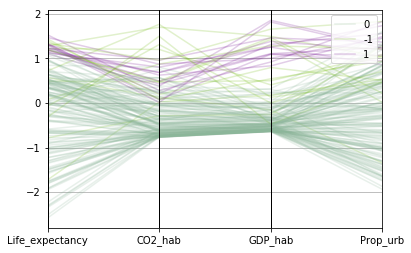

In [109]:
df_db_lab=df_without_outliers.copy(deep=True)
df_db_lab['Labels']=db.labels_
parallel_coordinates(df_db_lab,'Labels', alpha=0.2)
plt.show()

## Enveloppe des clusters

In [101]:
classes=df_km_lab['Labels']
features=df_km_lab.drop('Labels',axis=1)
#Tree_LE =Tree_LE.drop('Life_expectancy',axis=1)

km_tree  = DecisionTreeClassifier(criterion = 'entropy') # part aleatoire si deux split possibles 
                                                    # surtout si deux index sous equivalent gini entropy ...
clf = km_tree.fit(features,classes)
sortedLabelList = sorted(list(set(classes)))

In [103]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features.columns,  
                         class_names=sortedLabelList,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

TypeError: cannot concatenate 'str' and 'int' objects

In [79]:
    classes=df_km_lab['Labels']
featuresures=df_km_lab.drop('Labels',axis=1)
#Tree_LE =Tree_LE.drop('Life_expectancy',axis=1)

km_tree  = DecisionTreeClassifier(criterion = 'entropy') # part aleatoire si deux split possibles 
                                                    # surtout si deux index sous equivalent gini entropy ...
clf = km_tree.fit(features,classes)
sortedLabelList = np.arange(0,4,1)

In [85]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features.columns,  
                         class_names=classes)  
                         #filled=True, rounded=True,  
                         #special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

TypeError: cannot concatenate 'str' and 'numpy.int32' objects

## Comparaison des clusters

### Heatmap

### Création des labels pour chaque clustering

In [179]:
def confusion_matrix(c1,c2):
    """Retourne la matrice de contingence de deux clusterings c1 et c2."""
    Cla1 = c1.labels_
    Cla2 = c2.labels_
    Lab1 = map(str,sorted(set(Cla1.tolist())))
    Lab2 = map(str,sorted(set(Cla2.tolist())))
    allLabels = Lab1 + Lab2
    cm = metrics.confusion_matrix(Cla1.astype(str), Cla2.astype(str), labels=allLabels)
    cmdf = pds.DataFrame(data=cm, copy=True, index=allLabels, columns=allLabels)
    return cmdf

In [184]:
# Calcul des matrices
cm_kmdb=confusion_matrix(km,db)
cm_kmac=confusion_matrix(km,acwo)
cm_dbac=confusion_matrix(db,acwo)

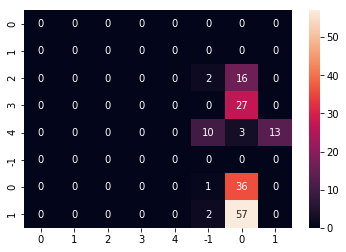

In [185]:
sns.heatmap(cm_kmdb, annot=True)

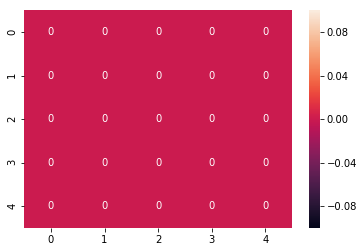

In [178]:
sns.heatmap(cm_kmac, annot=True)

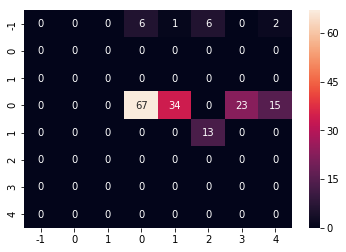

In [173]:
sns.heatmap(cm_dbac, annot=True)

# Création d'une étiquette de classe

Dans la suite de notre étude nous allons étudier nos données à l'aide d'une étiquette de classe, triant les pays en fonction de leur PIB par habitant. On considèrera 4 groupes :
* Les pays très pauvres
* Les pays pauvres
* Les pays moyennement riche
* Les pays riches

# Création des classe à l'aide d'un Kmeans en 1D sur le GDP par habitant

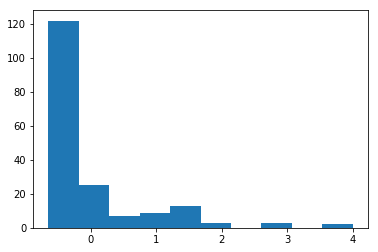

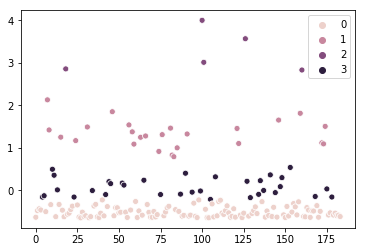

In [65]:
V_GDP_hab  = np.array(df_without_outliers['GDP_hab'])
KM_GDP = kmeans_1D(V_GDP_hab  , 4)
plot_kmeans1D(V_GDP_hab,KM_GDP.labels_)
INDEX = np.arange(0,len(V_GDP_hab))
sns.scatterplot(INDEX,V_GDP_hab, hue=KM_GDP.labels_ )

D'après ces représentations on repère des classes très hétérogènes où les pays les plus sont les plus nombreux. On observe aussi cinq pays très riches par rapport aux autres groupes